In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import math

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv(url, header=None, names=columns)

In [3]:
target = df['class']
features = df[['variance', 'skewness']]

In [4]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [5]:
pca = PCA(n_components=1)
projected_data = pca.fit_transform(features_scaled)

In [6]:
dataset = list(zip(projected_data[:, 0], target))

In [7]:
def grad(a, b):
    grada = 0
    gradb = 0
    for x, y in dataset:
        f = 1 / (1 + math.exp(-a * x - b))
        grada += 2 * (y - f) * (f * (1 - f) * -x)
        gradb += 2 * (y - f) * (f * (1 - f) * -1)
    return grada, gradb

In [8]:
def dist(anterior, novo):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(anterior, novo)))

In [9]:
def grad_desc(lr, xn, yn, tol, max_iter=1000000):
    d = float('inf')
    k = 0
    while d > tol and k < max_iter:
        grada, gradb = grad(xn, yn)
        xn1 = xn - lr * grada
        yn1 = yn - lr * gradb
        d = dist([xn, yn], [xn1, yn1])
        if any(abs(val) > 1e100 for val in [xn1, yn1, d]):
            print(f"Valores muito grandes detectados na iteração {k}. Interrompendo.")
            break

        xn, yn = xn1, yn1
        k += 1
    return [xn1, yn1, k]


In [10]:
z = grad_desc(1e-3, 1, 0, 1e-6)
print(f"z: {z}")

z: [2.812768086095674, -0.2836232528284687, 968]


In [11]:
x = [point[0] for point in dataset]
y = [point[1] for point in dataset]

In [12]:
a, b = z[0], z[1]

In [13]:
def predict(x):
    return 1 / (1 + math.exp(-a * x - b))

predictions = [1 if predict(x) >= 0.5 else 0 for x in x]
true_labels = list(y)

accuracy = sum(1 for pred, true in zip(predictions, true_labels) if pred == true) / len(true_labels)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.87


In [14]:
x1 = np.linspace(min(x) - 1, max(x) + 1, 400)
y1 = [1 / (1 + math.exp(-a * x - b)) for x in x1]

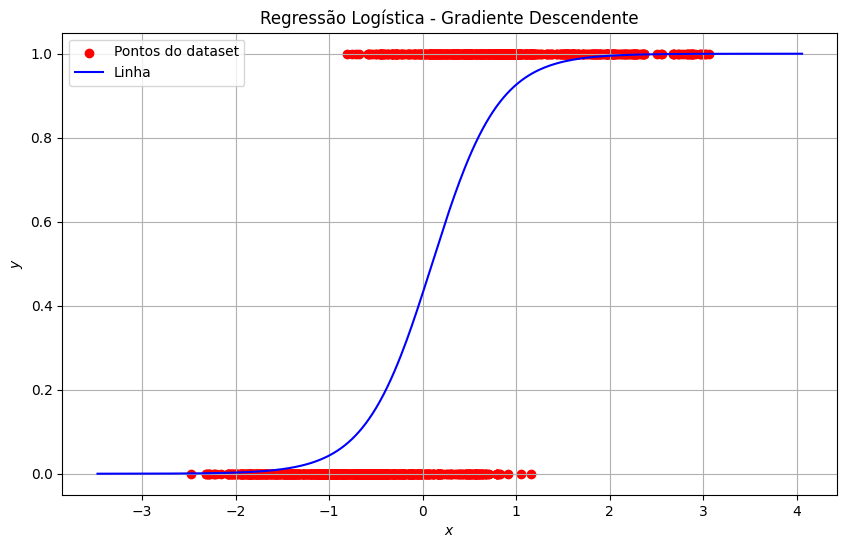

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Pontos do dataset')
plt.plot(x1, y1, color='blue', label=f'Linha')
plt.title('Regressão Logística - Gradiente Descendente')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

plt.show()

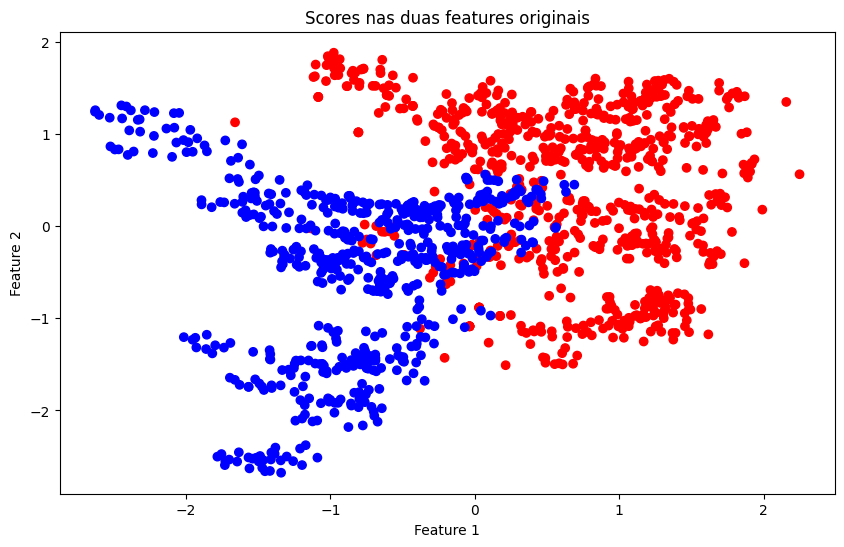

In [16]:
colors = ['red' if label == 0 else 'blue' for label in true_labels]
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=colors)
plt.title('Scores nas duas features originais')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()